# TODO:


In [1]:
import csv
import os
import numpy as np
import random
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib import font_manager as fm, rcParams
from sklearn import ensemble, tree, linear_model
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.colors import n_colors
from plotly.subplots import make_subplots
from sklearn.model_selection import train_test_split
from sklearn.linear_model import  Lasso
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error

plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus']=False

In [2]:
listings_data = pd.read_csv('shanghai_detailed/listings.csv',encoding="utf-8")
calendar_data = pd.read_csv('shanghai_detailed/calendar.csv',encoding="utf-8")
reviews_data = pd.read_csv('shanghai_detailed/reviews.csv',encoding="utf-8")
neighbour=pd.read_csv('shanghai_detailed/neighbourhoods.csv',encoding="utf-8")

In [3]:
listings_data

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,24963,https://www.airbnb.com/rooms/24963,20210222161123,2021-02-24,Heart of French Concession / Home,The flat is located in the heart of formal Fre...,"It's Shanghai Music Concession adjacent, lots ...",https://a0.muscache.com/pictures/560599/168338...,98203,https://www.airbnb.com/users/show/98203,...,9.0,10.0,9.0,NaN,f,2,2,0,0,0.67
1,24991,https://www.airbnb.com/rooms/24991,20210222161123,2021-02-24,French Concession Yongkang area,<b>The space</b><br />Location: two bedroom ap...,"Close to subway line 10/12, and line 1 South S...",https://a0.muscache.com/pictures/14647962/113e...,98203,https://www.airbnb.com/users/show/98203,...,10.0,8.0,10.0,NaN,f,2,2,0,0,0.01
2,139828,https://www.airbnb.com/rooms/139828,20210222161123,2021-02-24,【sidihome】The minimalist business apt In jing’an,[SidiHome·Minimal Series] The bedrooms are all...,"Central location, easy to get subway station l...",https://a0.muscache.com/pictures/fbf59417-707f...,681552,https://www.airbnb.com/users/show/681552,...,10.0,9.0,9.0,NaN,t,7,7,0,0,0.24
3,161932,https://www.airbnb.com/rooms/161932,20210222161123,2021-02-24,Sublet 1BR in Shanghai July 1-Aug 1,My place is close to art and culture and resta...,NaN,https://a0.muscache.com/pictures/f4917e85-7638...,774393,https://www.airbnb.com/users/show/774393,...,NaN,NaN,NaN,NaN,f,1,1,0,0,NaN
4,185736,https://www.airbnb.com/rooms/185736,20210222161123,2021-02-24,Apt in French Concession巨鹿路/富民路,This well-appointed apt located in the trendy ...,NaN,https://a0.muscache.com/pictures/53fa6866-a7ae...,891951,https://www.airbnb.com/users/show/891951,...,10.0,10.0,10.0,NaN,f,1,0,1,0,0.15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36289,48274993,https://www.airbnb.com/rooms/48274993,20210222161123,2021-02-23,伊间丨近地铁丨上海南站丨上海师范大学丨华东理工大学丨上海植物园丨前滩休闲公园丨舒享大床房,【房东自我介绍】您好，我是晨晨，是个拥有怀旧情怀的洒脱男生。我喜欢美好有底蕴的文化，喜欢旅游...,步行的这里来分分钟身边都是风景，各种风格的酒吧餐厅让你留连其中~不管你是来上海旅游，商务，求...,https://a0.muscache.com/pictures/becd81dd-e392...,236701123,https://www.airbnb.com/users/show/236701123,...,NaN,NaN,NaN,NaN,t,179,173,6,0,NaN
36290,48275222,https://www.airbnb.com/rooms/48275222,20210222161123,2021-02-23,伊间丨近地铁丨上海南站丨上海师范大学丨华东理工大学丨上海植物园丨前滩休闲公园丨静谧套房,【房东自我介绍】您好，我是晨晨，是个拥有怀旧情怀的洒脱男生。我喜欢美好有底蕴的文化，喜欢旅游...,步行的这里来分分钟身边都是风景，各种风格的酒吧餐厅让你留连其中~不管你是来上海旅游，商务，求...,https://a0.muscache.com/pictures/5eddf5d4-1d8d...,121939617,https://www.airbnb.com/users/show/121939617,...,NaN,NaN,NaN,NaN,t,199,195,4,0,NaN
36291,48275223,https://www.airbnb.com/rooms/48275223,20210222161123,2021-02-23,伊间丨近地铁丨上海南站丨上海师范大学丨华东理工大学丨上海植物园丨前滩休闲公园丨静谧套房,【房东自我介绍】您好，我是晨晨，是个拥有怀旧情怀的洒脱男生。我喜欢美好有底蕴的文化，喜欢旅游...,步行的这里来分分钟身边都是风景，各种风格的酒吧餐厅让你留连其中~不管你是来上海旅游，商务，求...,https://a0.muscache.com/pictures/6a4db3c6-cace...,236701123,https://www.airbnb.com/users/show/236701123,...,NaN,NaN,NaN,NaN,t,179,173,6,0,NaN
36292,48275608,https://www.airbnb.com/rooms/48275608,20210222161123,2021-02-23,吴中路青年公寓15线吴中路站,六人间，有阳台阳光充足。配有书桌、衣柜无线网络等。小区环境优美安静舒适。欢迎您的到来,吴中路380弄，新地铁15号线吴中路站步行几分钟即到。如有路线问题欢迎电话咨询,https://a0.muscache.com/pictures/11b66bf2-a5e4...,385220965,https://www.airbnb.com/users/show/385220965,...,NaN,NaN,NaN,NaN,t,3,0,0,3,NaN


In [4]:
listings_data.dtypes

id                                                int64
listing_url                                      object
scrape_id                                         int64
last_scraped                                     object
name                                             object
                                                 ...   
calculated_host_listings_count                    int64
calculated_host_listings_count_entire_homes       int64
calculated_host_listings_count_private_rooms      int64
calculated_host_listings_count_shared_rooms       int64
reviews_per_month                               float64
Length: 74, dtype: object

In [5]:
calendar_data

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,1825216,2021-02-25,t,$135.00,$135.00,1.0,1125.0
1,24963,2021-02-24,f,$452.00,$452.00,3.0,365.0
2,24963,2021-02-25,f,$452.00,$452.00,3.0,365.0
3,24963,2021-02-26,f,$452.00,$452.00,3.0,365.0
4,24963,2021-02-27,f,$452.00,$452.00,3.0,365.0
...,...,...,...,...,...,...,...
13225028,48260641,2022-02-19,t,$400.00,$400.00,1.0,1125.0
13225029,48260641,2022-02-20,t,$400.00,$400.00,1.0,1125.0
13225030,48260641,2022-02-21,t,$400.00,$400.00,1.0,1125.0
13225031,48260641,2022-02-22,t,$400.00,$400.00,1.0,1125.0


In [6]:
reviews_data

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,24963,105158,2010-09-26,125515,Lucia,Even though the actual apt listed was not read...
1,24963,191610,2011-03-03,311924,Marty,Jia's place is in a vibrant and (in my opinion...
2,24963,347084,2011-07-02,23521,Thomas,The host canceled my reservation the day befor...
3,24963,384765,2011-07-20,491296,Nikko,JIa and her apt was great! It was easy to fin...
4,24963,406458,2011-07-30,228345,Deborah And Andrew,"Clean, spacious apartment in a lovely neighbor..."
...,...,...,...,...,...,...
348757,48214764,733530936,2021-02-21,342811651,岩林,"挺美的一家民宿,各个方面都不错,房间装饰得温馨,住得很愉快"
348758,48234979,734154792,2021-02-24,243174081,静妮,"很大的一个House,装修格调太棒了,干净简洁舒适洗衣机烘干机开放式厨房,还有一个管家阿叔住..."
348759,48236359,733537983,2021-02-21,201684937,Anna,"房子和图片一致,干净整洁漂亮,里面空间很大很大｡离地铁站步行也只要几分钟,下次还会预定"
348760,48236359,733788812,2021-02-22,389608991,金荣,"和图片一样,房子超美超级大,房间也很干净,洗漱用品一应俱全,就在老西门地铁口,出行非常方便,..."


In [7]:
neighbour

,neighbourhood_group,neighbourhood
0,NaN,嘉定区 / Jiading District
1,NaN,奉贤区 / Fengxian District
2,NaN,宝山区 / Baoshan District
3,NaN,崇明区 / Chongming District
4,NaN,徐汇区 / Xuhui District
5,NaN,普陀区 / Putuo District
6,NaN,杨浦区 / Yangpu District
7,NaN,松江区 / Songjiang District
8,NaN,浦东新区 / Pudong
9,NaN,虹口区 / Hongkou District


## 数据清洗

In [8]:
cleaned_list = listings_data.drop(['license','neighbourhood_group_cleansed','maximum_nights_avg_ntm','calendar_updated'], axis=1)
cleaned_list.fillna({'reviews_per_month':0}, inplace=True)

In [9]:
cleaned_list.isnull().sum()

id                                              0
listing_url                                     0
scrape_id                                       0
last_scraped                                    0
name                                            2
                                               ..
calculated_host_listings_count                  0
calculated_host_listings_count_entire_homes     0
calculated_host_listings_count_private_rooms    0
calculated_host_listings_count_shared_rooms     0
reviews_per_month                               0
Length: 70, dtype: int64

In [10]:
cleaned_list.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'description',
       'neighborhood_overview', 'picture_url', 'host_id', 'host_url',
       'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'latitude', 'longitude', 'property_type',
       'room_type', 'accommodates', 'bathrooms', 'bathrooms_text', 'bedrooms',
       'beds', 'amenities', 'price', 'minimum_nights', 'maximum_nights',
       'minimum_minimum_nights', 'maximum_minimum_nights',
       'minimum_maximum_nights', 'maximum_maximum_nights',
       'minimum_nights_avg_ntm', 'has_availability', 'availability_30',
       'availability_60', 'availability

In [11]:
res = cleaned_list.groupby('neighbourhood_cleansed') #按区域分组
area_list = neighbour['neighbourhood'].to_list()
neighb_counts = {}
for area in  area_list:
    counts = res.get_group(area).shape[0]
    neighb_counts[area] = counts
# neighb_counts

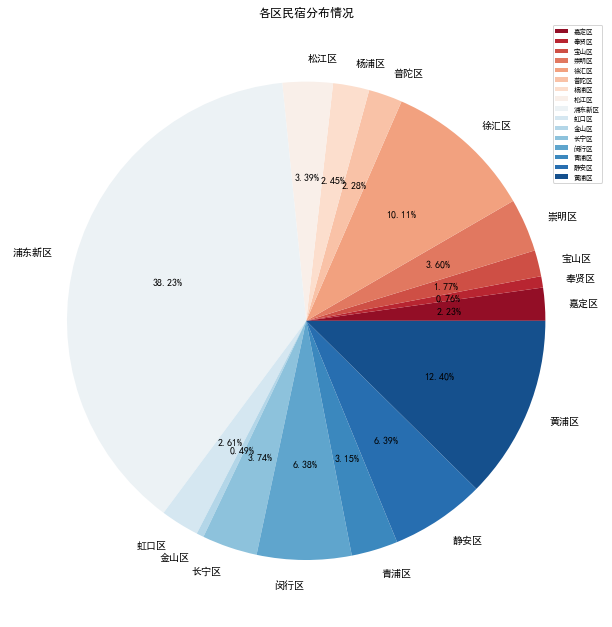

In [12]:
plt.figure(figsize=(11,11))
plt.title('各区民宿分布情况')
label = [i[0].split(' /')[0] for i in neighb_counts.items()]
data = [i[1] for i in neighb_counts.items()]
max_area = sorted(neighb_counts.items(), key=lambda x:x[1],reverse=True)[:3] #选择民宿最多的三个区突出显示
max_area = [i[0] for i in max_area]
explode = [0.1 if i in max_area else 0 for i in label]
color = sns.color_palette("RdBu", len(label))
plt.pie(data, labels = label, explode = explode, autopct='%.2f%%', colors=color)
plt.legend(loc='best', fontsize=6.5)
plt.savefig('./fig/各区分布情况.jpg')#保存图片
plt.show()

In [13]:
neighb_counts.items()

dict_items([('嘉定区 / Jiading District', 808), ('奉贤区 / Fengxian District', 277), ('宝山区 / Baoshan District', 641), ('崇明区 / Chongming District', 1308), ('徐汇区 / Xuhui District', 3671), ('普陀区 / Putuo District', 828), ('杨浦区 / Yangpu District', 888), ('松江区 / Songjiang District', 1232), ('浦东新区 / Pudong', 13877), ('虹口区 / Hongkou District', 946), ('金山区 / Jinshan District', 179), ('长宁区 / Changning District', 1358), ('闵行区 / Minhang District', 2317), ('青浦区 / Qingpu District', 1143), ("静安区 / Jing'an District", 2321), ('黄浦区 / Huangpu District', 4500)])

In [14]:
picked_columns=['id', 'name', 'host_id',
       'host_name','neighbourhood_cleansed','host_neighbourhood', 'latitude', 'longitude', 'property_type',
       'room_type', 'accommodates','bathrooms_text', 'bedrooms',
       'beds', 'amenities', 'minimum_nights', 'maximum_nights',
       'has_availability', 'availability_30', 'availability_60',
       'availability_90', 'availability_365',
       'number_of_reviews','review_scores_rating',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value', 
       'calculated_host_listings_count', 'reviews_per_month','host_response_time',
        'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost','price']

In [15]:
cleaned_list = cleaned_list.drop(cleaned_list[cleaned_list['number_of_reviews']==0].index)
(cleaned_list.isnull().sum())

id                                              0
listing_url                                     0
scrape_id                                       0
last_scraped                                    0
name                                            1
                                               ..
calculated_host_listings_count                  0
calculated_host_listings_count_entire_homes     0
calculated_host_listings_count_private_rooms    0
calculated_host_listings_count_shared_rooms     0
reviews_per_month                               0
Length: 70, dtype: int64

In [16]:
features = cleaned_list[picked_columns]

In [17]:
def convert_currency(var):
    """
    convert the string number to a float
    _ 去除$
    - 去除逗号，
    - 转化为浮点数类型
    """
    new_value = var.replace(",","").replace("$","")
    return float(new_value)

x = features.copy()
features.loc[:,'price'] = x["price"].apply(convert_currency)

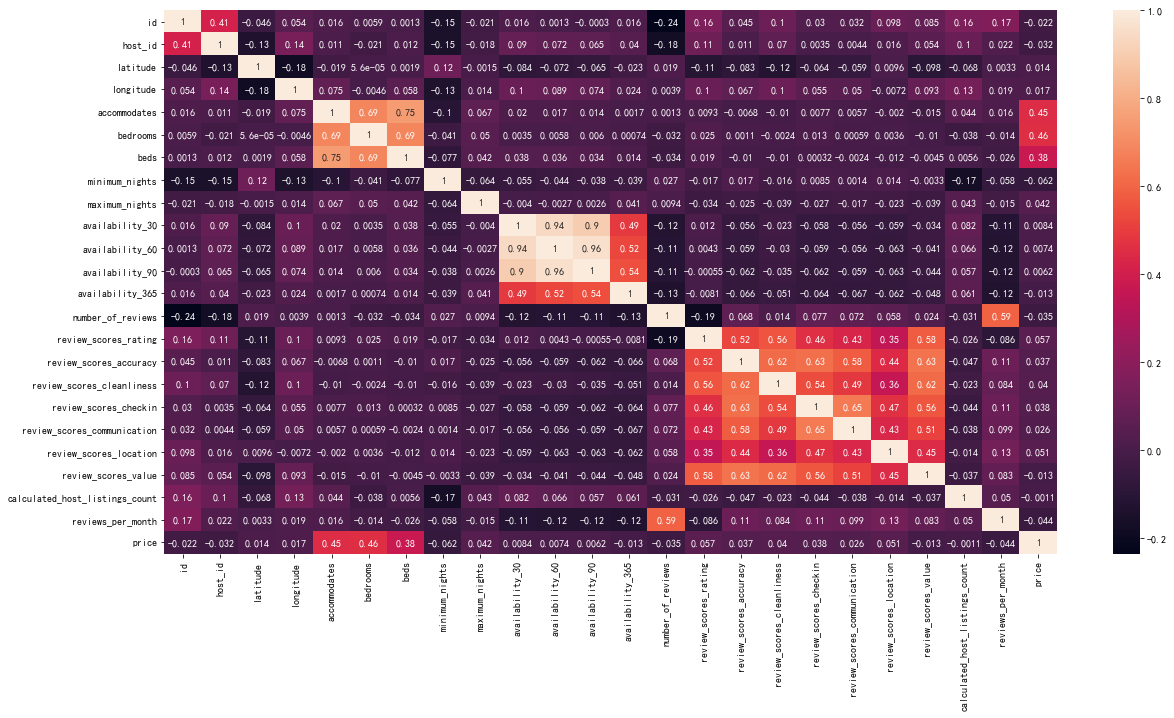

In [18]:
corr = features.corr(method='kendall')
plt.figure(figsize=(20,10))
sns.heatmap(corr, annot=True)
plt.savefig('./fig/pca.jpg')#保存图片

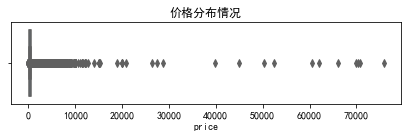

In [19]:
plt.figure(figsize=(7,1.5))
plt.title('价格分布情况')
sns.boxplot(features['price'],whis=0.5, palette="Blues")

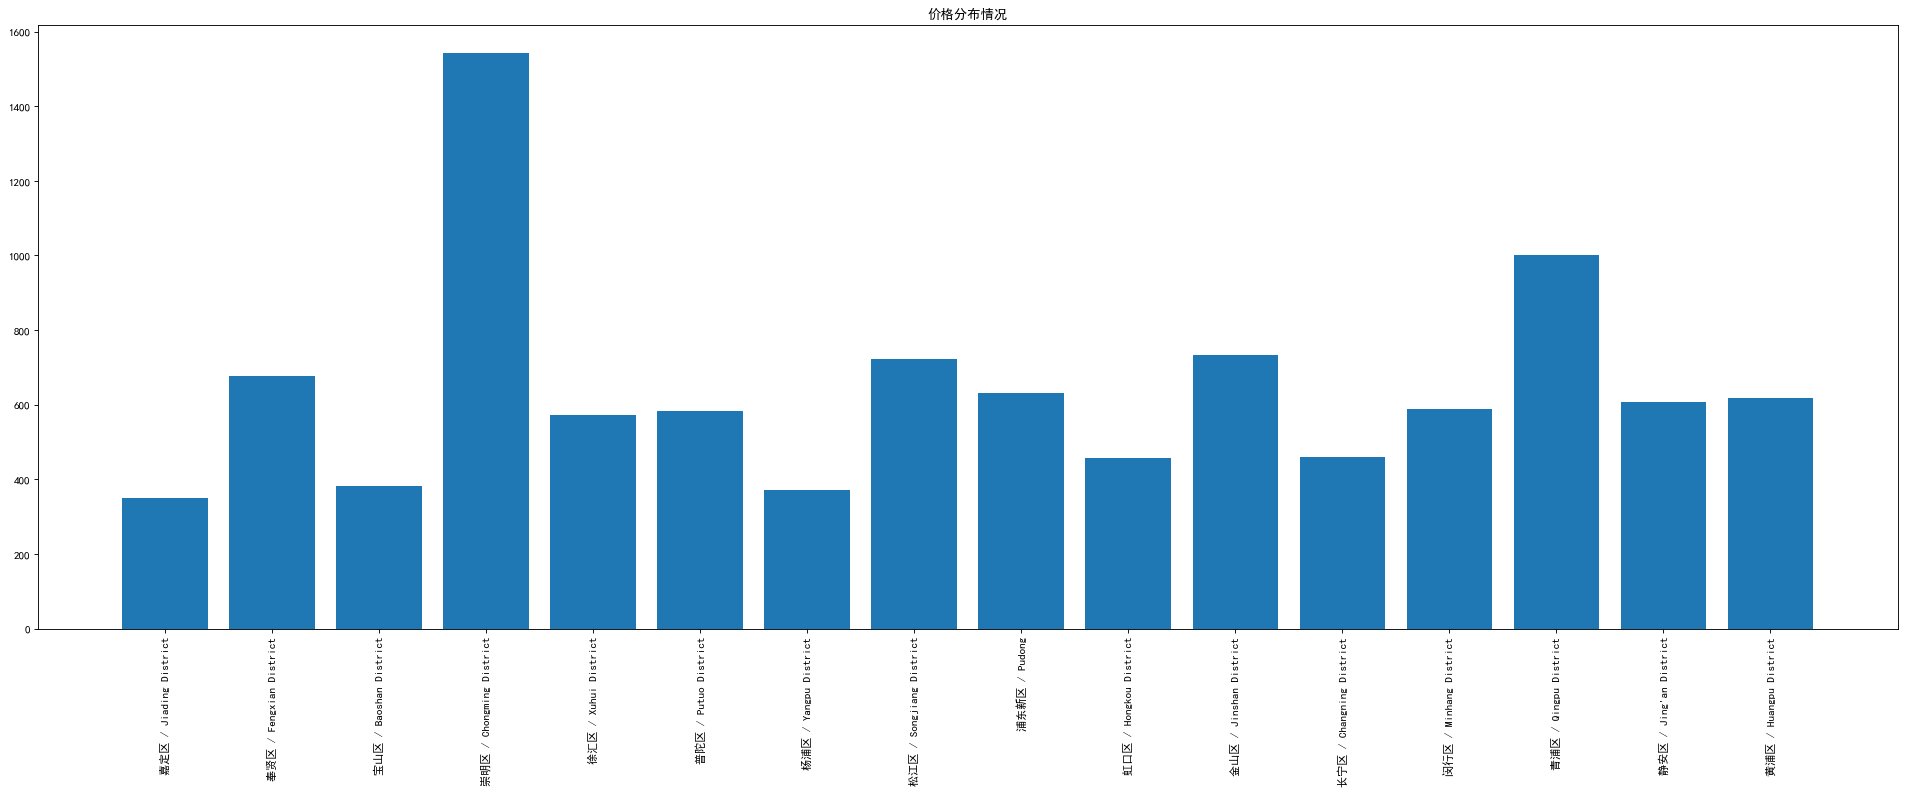

In [20]:
neighbourhood_price=pd.pivot_table(features,index="neighbourhood_cleansed",values="price",aggfunc=np.mean)
neighbourhood_price.head()

plt.figure(figsize=(30,10),dpi=80)
plt.title('价格分布情况')
plt.bar(neighbourhood_price.index,neighbourhood_price.price) 
plt.xticks(rotation=90)  # 旋转坐标标签
plt.savefig('./fig/价格分布情况.jpg')#保存图片

# Baseline

In [30]:
feature_columns=['neighbourhood_cleansed','room_type','price',
                 'minimum_nights','calculated_host_listings_count','availability_365',
                 'review_scores_accuracy', 'review_scores_cleanliness',
                   'review_scores_checkin', 'review_scores_communication',
                   'review_scores_location', 'review_scores_value','host_is_superhost','number_of_reviews']
# 'host_response_time','host_response_rate', 'host_acceptance_rate'
# within a few hours,100% ,50% 
data = features[feature_columns]

In [31]:
def mape(y_true, y_pred):
    """
    参数:
    y_true -- 测试集目标真实值
    y_pred -- 测试集目标预测值
    
    返回:
    mape -- MAPE 评价指标
    """
    
    n = len(y_true)
    mape = sum(np.abs((y_true - y_pred)/y_true))/n*100
    return mape

In [32]:
room_type_label,room_type_map = data['room_type'].factorize()
data['room_type'] = room_type_label

neighbourhood_cleansed_label,neighbourhood_cleansed_map = data['neighbourhood_cleansed'].factorize()
data['neighbourhood_cleansed'] = neighbourhood_cleansed_label
data.head()

,neighbourhood_cleansed,room_type,price,minimum_nights,calculated_host_listings_count,availability_365,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,host_is_superhost,number_of_reviews
0,0,0,452.0,3,2,297,10.0,9.0,9.0,9.0,10.0,9.0,t,85
1,0,0,517.0,3,2,189,10.0,10.0,10.0,10.0,8.0,10.0,t,1
2,1,0,355.0,3,7,331,9.0,9.0,10.0,10.0,9.0,9.0,t,26
4,0,1,500.0,1,1,364,10.0,9.0,10.0,10.0,10.0,10.0,f,8
5,2,1,160.0,2,1,89,10.0,9.0,10.0,10.0,10.0,9.0,f,85


In [33]:
neighbourhood_cleansed_map

Index(['徐汇区 / Xuhui District', '普陀区 / Putuo District',
       '长宁区 / Changning District', '静安区 / Jing'an District',
       '杨浦区 / Yangpu District', '虹口区 / Hongkou District', '浦东新区 / Pudong',
       '黄浦区 / Huangpu District', '嘉定区 / Jiading District',
       '崇明区 / Chongming District', '宝山区 / Baoshan District',
       '松江区 / Songjiang District', '青浦区 / Qingpu District',
       '奉贤区 / Fengxian District', '闵行区 / Minhang District',
       '金山区 / Jinshan District'],
      dtype='object')

In [34]:
data.loc[data['host_is_superhost']=='t','host_is_superhost'] = 1
data.loc[data['host_is_superhost']=='f','host_is_superhost'] = 0
data['host_is_superhost'] = data['host_is_superhost'].astype(float)
data.head()

,neighbourhood_cleansed,room_type,price,minimum_nights,calculated_host_listings_count,availability_365,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,host_is_superhost,number_of_reviews
0,0,0,452.0,3,2,297,10.0,9.0,9.0,9.0,10.0,9.0,1.0,85
1,0,0,517.0,3,2,189,10.0,10.0,10.0,10.0,8.0,10.0,1.0,1
2,1,0,355.0,3,7,331,9.0,9.0,10.0,10.0,9.0,9.0,1.0,26
4,0,1,500.0,1,1,364,10.0,9.0,10.0,10.0,10.0,10.0,0.0,8
5,2,1,160.0,2,1,89,10.0,9.0,10.0,10.0,10.0,9.0,0.0,85


In [35]:
data = data.dropna()
data.describe()

,neighbourhood_cleansed,room_type,price,minimum_nights,calculated_host_listings_count,availability_365,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,host_is_superhost,number_of_reviews
count,19153.000000,19153.000000,19153.000000,19153.000000,19153.000000,19153.000000,19153.000000,19153.000000,19153.000000,19153.000000,19153.000000,19153.000000,19153.000000,19153.000000
mean,6.015298,0.451887,616.379105,3.971702,16.475069,230.051376,9.674986,9.579074,9.743382,9.782488,9.688456,9.548269,0.441758,17.793923
std,3.329482,0.550210,1601.519586,24.562818,31.447823,136.423657,0.993972,1.045600,0.895772,0.863848,0.870596,1.076968,0.496609,31.814993
min,0.000000,0.000000,37.000000,1.000000,1.000000,0.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,0.000000,1.000000
25%,5.000000,0.000000,233.000000,1.000000,3.000000,90.000000,10.000000,10.000000,10.000000,10.000000,10.000000,9.000000,0.000000,2.000000
50%,6.000000,0.000000,335.000000,1.000000,9.000000,268.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,0.000000,6.000000
75%,7.000000,1.000000,511.000000,1.000000,17.000000,365.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,1.000000,19.000000
max,15.000000,2.000000,75771.000000,1000.000000,274.000000,365.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,1.000000,426.000000


In [36]:
y = data['price']
x= data.drop(['price'],axis=1)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.1,random_state=105)

## Linear Regression

In [155]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score


linreg = LinearRegression()
linreg.fit(x_train,y_train)
y_pred=(linreg.predict(x_test))

print('R-squared train score: {:.3f}'.format(linreg.score(x_train, y_train)))
print('R-squared test score: {:.3f}'.format(linreg.score(x_test, y_test)))

R-squared train score: 0.017
R-squared test score: 0.037


## Ridge Regression

In [156]:
from sklearn.linear_model import Ridge

ridge = Ridge()
ridge.fit(x_train, y_train)

y_pred=ridge.predict(x_test)

print('R-squared train score: {:.3f}'.format(ridge.score(x_train, y_train)))
print('R-squared test score: {:.3f}'.format(ridge.score(x_test, y_test)))

R-squared train score: 0.017
R-squared test score: 0.037


## Lasso Regression

In [157]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=10,max_iter = 10000)
lasso.fit(x_train, y_train)

print('R-squared score (training): {:.3f}'.format(lasso.score(x_train, y_train)))
print('R-squared score (test): {:.3f}'.format(lasso.score(x_test, y_test)))

R-squared score (training): 0.016
R-squared score (test): 0.040


## Decision Tree Regressor

In [158]:
from sklearn.tree import DecisionTreeRegressor
DTree=DecisionTreeRegressor(min_samples_leaf=.0001)
DTree.fit(x_train,y_train)

print('R-squared score (training): {:.3f}'.format(DTree.score(x_train, y_train)))
print('R-squared score (test): {:.3f}'.format(DTree.score(x_test, y_test)))

R-squared score (training): 0.490
R-squared score (test): -0.771


## XGBoost

In [44]:
from xgboost import XGBRegressor
from xgboost import plot_importance
import time
from sklearn.metrics import r2_score

def plot_features(booster, figsize):    
    fig, ax = plt.subplots(1,1,figsize=figsize,dpi=100)
    return plot_importance(booster=booster, ax=ax)

In [38]:
ts = time.time()

xgb = XGBRegressor(
    max_depth=8,
    n_estimators=1000,
    min_child_weight=300, 
    colsample_bytree=0.8, 
    subsample=0.8, 
    eta=0.3,    
    seed=42)

xgb.fit(
    x_train, 
    y_train, 
    eval_metric="rmse", 
    eval_set=[(x_train, y_train), (x_test, y_test)], 
    verbose=True, 
    early_stopping_rounds = 10)

print('Train time:',time.time() - ts)
print('R-squared score (training): {:.3f}'.format(r2_score(y_train, xgb.predict(x_train))))
print('R-squared score (test): {:.3f}'.format(r2_score(y_test, xgb.predict(x_test))))

[0]	validation_0-rmse:1701.94104	validation_1-rmse:1008.12060
[1]	validation_0-rmse:1666.17981	validation_1-rmse:959.71313
[2]	validation_0-rmse:1639.82532	validation_1-rmse:931.30609
[3]	validation_0-rmse:1629.63635	validation_1-rmse:920.70935
[4]	validation_0-rmse:1620.66272	validation_1-rmse:912.25238
[5]	validation_0-rmse:1615.26123	validation_1-rmse:907.86389
[6]	validation_0-rmse:1613.06628	validation_1-rmse:906.82782
[7]	validation_0-rmse:1609.06335	validation_1-rmse:906.58307
[8]	validation_0-rmse:1605.46155	validation_1-rmse:904.15057
[9]	validation_0-rmse:1604.04675	validation_1-rmse:904.27612
[10]	validation_0-rmse:1602.75232	validation_1-rmse:903.49890
[11]	validation_0-rmse:1601.13660	validation_1-rmse:902.99744
[12]	validation_0-rmse:1599.11975	validation_1-rmse:901.99225
[13]	validation_0-rmse:1597.60498	validation_1-rmse:902.78021
[14]	validation_0-rmse:1596.17688	validation_1-rmse:900.86597
[15]	validation_0-rmse:1594.78491	validation_1-rmse:901.83551
[16]	validation_0

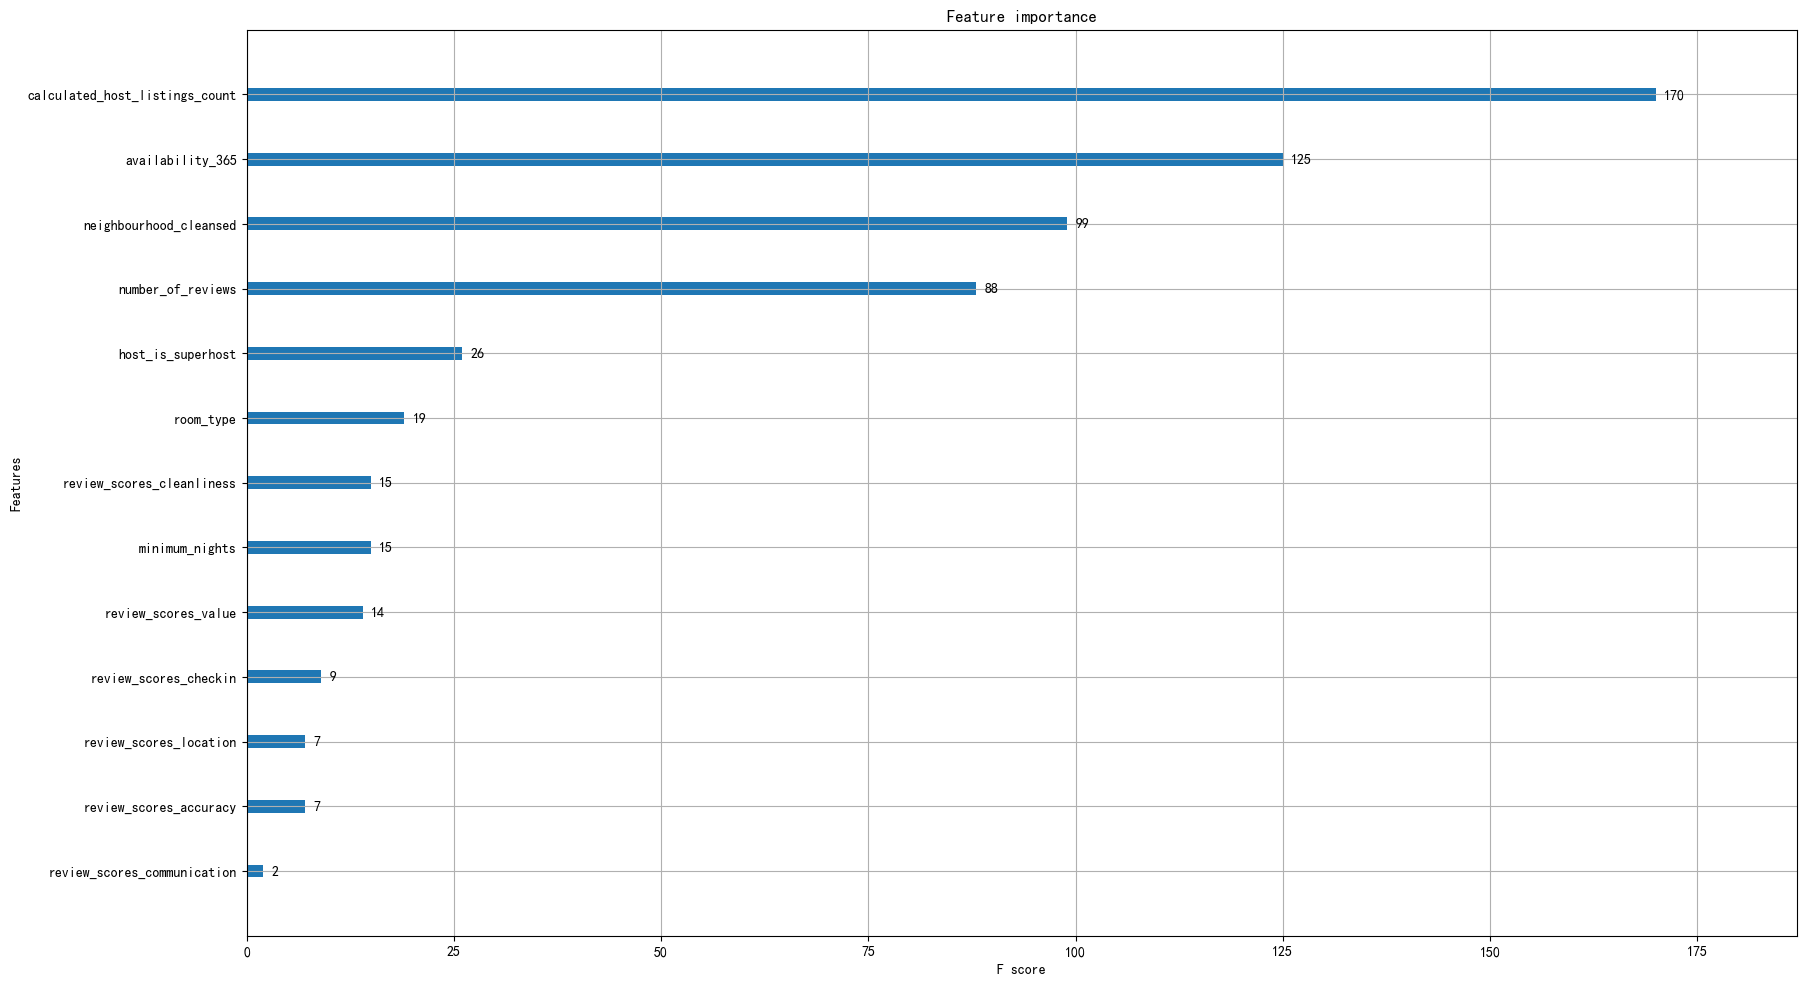

In [45]:
plot_features(xgb, (20,12))
plt.savefig('./fig/Feature_importance.jpg')

## Random forest Regressor

In [ ]:
from sklearn.ensemble import RandomForestClassifier

regressor = RandomForestClassifier()
regressor.fit(x_train[:100], y_train[:100])

print('R-squared score (training): {:.3f}'.format(regressor.score(x_train, y_train)))
print('R-squared score (test): {:.3f}'.format(regressor.score(x_test, y_test)))